## Import Libraries and Read Data

In [101]:
# Libraries to manipulate data
import numpy as np
import pandas as pd
import json

# Modules, classes, and methods from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Others
import matplotlib.pyplot as plt
import joblib

## Read the Dataset and Split it into Train Set and Test Set

In [102]:
# Read the data from the json file
data_path = "../data/raw/fashion_products.json"
with open(data_path) as f:
    data = json.load(f)

# Normalize the data and create a dataframe
df = pd.json_normalize(data)
df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,adidas Men's Athletic Cushioned Crew Socks wit...,13.99,13.99,42763,"[79, 12, 5, 2, 2]","[Black/Aluminum 2, Heather Grey/Black, White/B...",Cushioned in the foot for comfort and durabili...,"97% Polyester, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Performance Cushion Crew Socks with Band ...,28.22,37.00,8619,"[79, 10, 5, 2, 5]","[Black/White, White/Black]",Reinforced heel and toe for enhanced durabilit...,76% Cotton/21% Nylon/2% Spandex/1% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thermajohn Long Johns Thermal Underwear for Me...,25.49,31.99,52418,"[76, 14, 5, 2, 3]","[Black, Charcoal, Grey, Navy, White, Christmas...",Heat Retention: When it comes to warmth and ev...,"92% Polyester, 8% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Calvin Klein Men's Cotton Stretch 7-Pack Boxer...,54.05,76.53,12714,"[75, 12, 6, 3, 6]","[2 Blue Shadow, 2 White, 2 Black, 1 Cobalt Wat...","COTTON STRETCH: Spun in pure, premium cotton y...","95% Cotton, 5% Elastane",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Hoodie, EcoSmart Fleece Hoodie, Ho...",11.46,11.46,176801,"[72, 15, 7, 3, 4]","[Army Brown, Ash, Black, Cardinal, Charcoal He...",FLEECE TO FEEL GOOD ABOUT - Hanes EcoSmart men...,"50% Cotton, 50% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   title                                   4690 non-null   object 
 1   price_min                               4690 non-null   float64
 2   price_max                               4690 non-null   float64
 3   rating_total                            4690 non-null   int64  
 4   rating_percent                          4580 non-null   object 
 5   variants                                4690 non-null   object 
 6   product_about                           4690 non-null   object 
 7   product_details.Fabric type             4526 non-null   object 
 8   product_details.Care instructions       4449 non-null   object 
 9   product_details.Origin                  4049 non-null   object 
 10  product_details.Fit type                146 non-null    obje

- By observing basic information of the data using the `.info()` method, we can see that there are many columns missing very large proportion of data.

In [104]:
# # NOTICE: WE ONLY RUN THIS PIECE OF CODE 1 TIME. PLEASE DON'T UNCOMMENT
# # CHÚ Ý: ĐỪNG THÁO COMMENT ĐOẠN CODE NÀY

# # Sample 80% of the data for training and 20% for testing
# train, test = train_test_split(df, test_size=0.2)

# # Save the train and test data
# train.to_csv("../data/raw/train.csv", index=False)
# test.to_csv("../data/raw/test.csv", index=False)

## Data Preparation

In [105]:
# Read the train set
train_df = pd.read_csv("../data/raw/train.csv")

# Inspect the train set
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,"[74, 14, 5, 3, 3]",[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"[82, 8, 5, 1, 4]","['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"[68, 18, 5, 4, 5]","['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"[66, 16, 8, 3, 8]","['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"[74, 14, 6, 2, 4]","['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

#### Handle Missing Data

In [106]:
# We will drop columns with more than 30% missing values.
null_percents = train_df.isnull().sum() / len(train_df) * 100
null_percents

title                                       0.000000
price_min                                   0.000000
price_max                                   0.000000
rating_total                                0.000000
rating_percent                              2.558635
variants                                    0.000000
product_about                               1.359275
product_details.Fabric type                 3.651386
product_details.Care instructions           5.117271
product_details.Origin                     13.486141
product_details.Fit type                   96.855011
product_details.Pattern                    86.833689
product_details.Closure type               55.490405
product_details.Rise style                 98.001066
product_details.Weave type                 97.414712
product_details.Country of Origin          92.190832
product_details.Neck style                 95.495736
product_details.Leg style                  99.546908
product_details.Fur description            99.

In [107]:
drop_columns = [column for column in null_percents.index if null_percents[column] > 30]
drop_columns

['product_details.Fit type',
 'product_details.Pattern',
 'product_details.Closure type',
 'product_details.Rise style',
 'product_details.Weave type',
 'product_details.Country of Origin',
 'product_details.Neck style',
 'product_details.Leg style',
 'product_details.Fur description',
 'product_details.Outer material',
 'product_details.Length',
 'product_details.Bottom style',
 'product_details.Sole material',
 'product_details.Water resistance level',
 'product_details.Sleeve type',
 'product_details.Inseam',
 'product_details.Shaft height',
 'product_details.Pocket style',
 'product_details.Shaft circumference',
 'product_details.Inner material',
 'product_details.Material',
 'product_details.Item type name']

- Later, when we deal with the test set, we also need to drop these columns to align with the train set.

In [108]:
# Now, we will drop the columns with more than 30% missing values.
train_df = train_df.drop(columns=drop_columns)
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,"[74, 14, 5, 3, 3]",[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"[82, 8, 5, 1, 4]","['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"[68, 18, 5, 4, 5]","['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"[66, 16, 8, 3, 8]","['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"[74, 14, 6, 2, 4]","['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   rating_percent                     3656 non-null   object 
 5   variants                           3752 non-null   object 
 6   product_about                      3701 non-null   object 
 7   product_details.Fabric type        3615 non-null   object 
 8   product_details.Care instructions  3560 non-null   object 
 9   product_details.Origin             3246 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 293.2+ KB


- We need to admit that there are features/variables we cannot impute, those are:
  - `rating_percent`
  - `product_about`
  - `product_details.Fabric type`
  - `product_details.Care instructions`
  - `product_details.Origin`
- We need to decide whether to drop rows missing these feature or fill them with `"unknown"` (for categorical variable) or 0 (for numerical variable). At this point, we choose not to drop any rows but fill them instead.

##### Rating percent

In [110]:
# Check for missing values on "rating_percent" column
train_df['rating_percent'].isnull().sum()

96

In [111]:
# Convert 'rating_percent' from string like "[[76, 12, 7, 2, 3]]"" to list of integers
def convert_rating_percent(x) -> list:
    # If x is not string, return an empty list
    if not isinstance(x, str):
        return []

    x = x.replace('None', '0')
    x = x.strip('[]').split(', ')
    result = list(map(int, x))
    
    return result

train_df['rating_percent'] = train_df['rating_percent'].apply(convert_rating_percent)
train_df['rating_percent']

0       [74, 14, 5, 3, 3]
1        [82, 8, 5, 1, 4]
2       [68, 18, 5, 4, 5]
3       [66, 16, 8, 3, 8]
4       [74, 14, 6, 2, 4]
              ...        
3747    [71, 15, 7, 3, 4]
3748    [72, 13, 6, 3, 5]
3749     [77, 9, 5, 4, 5]
3750     [81, 7, 6, 2, 4]
3751    [77, 10, 6, 2, 7]
Name: rating_percent, Length: 3752, dtype: object

- By observing the result of the cell above, we can see that the last row (the `3751`th row) has its sum not to be `100`, which is illogical because the total percentage of all type of ratings (from `1` to `5`) must be `100%`. So, we can feel that there'r something weird about the values of this `rating_percent` column; thereby needing to investigate. We will calculate the sum of each rows in this column and inspect the unique sums resulted.

In [112]:
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    2267
99      729
101     644
0        96
102       9
98        7
Name: count, dtype: int64

- We admit that the amount of errorneous values are huge and therefore dropping all of them can cause a unacceptable loss of information. So, we need to find out a way to scale each values of the column to make their sum become 100 without significantly changing the actual meaning of them.

In [113]:
def scale_rating_percent(rating_percent: list[int]) -> list[int]:
    """
    This function scales the rating_percent list to make its sum to be 100.
    """
    
    if len(rating_percent) == 0:
        return rating_percent
    
    current_sum = sum(rating_percent)
    
    if current_sum == 100:
        return rating_percent
    
    values_to_distribute = 100 - current_sum # This can be positive or negative.
    
    unit = 1 if values_to_distribute > 0 else -1
    
    for i in range(abs(values_to_distribute)):
        # Add unit to a random position in rating_percent
        rating_percent[np.random.randint(5)] += unit
    
    return rating_percent

In [114]:
# Let's test the function above with an errorneous list
errorneous_list = [77, 10, 6, 2, 7]
sum(scale_rating_percent(errorneous_list))

100

- Okay it's worked. Now we apply this function on the `rating_percent` column.

In [115]:
train_df['rating_percent'] = train_df['rating_percent'].apply(scale_rating_percent)
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    3656
0        96
Name: count, dtype: int64

In [116]:
def calc_weighted_rating(rating_percent) -> np.float64:
    if len(rating_percent) != 5:
        return np.nan
    
    rating_percent = np.array(rating_percent.copy()) / 100
    rating_scale = [5, 4, 3, 2, 1]
    
    return np.dot(rating_percent, rating_scale)

In [117]:
train_df['weighted_rating'] = train_df['rating_percent'].apply(func=calc_weighted_rating)
train_df['weighted_rating'].head()

0    4.51
1    4.63
2    4.40
3    4.27
4    4.52
Name: weighted_rating, dtype: float64

In [118]:
train_df.drop(columns=['rating_percent'], inplace=True)
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN,4.51
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,4.63
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,4.40
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.27
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,4.52


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3701 non-null   object 
 6   product_details.Fabric type        3615 non-null   object 
 7   product_details.Care instructions  3560 non-null   object 
 8   product_details.Origin             3246 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


##### Product about, Fabric type, Care instructions and Origin

In [120]:
# Fill missing value of `product_about` with empty string
train_df['product_about'] = train_df['product_about'].fillna('')

# Fill missing value of `product_details.Fabric type`, `product_details.Care instructions`,
# and `product_details.Origin` with "Unknown"
train_df['product_details.Fabric type'] = train_df['product_details.Fabric type'].fillna('unknown')
train_df['product_details.Care instructions'] = train_df['product_details.Care instructions'].fillna('unknown')
train_df['product_details.Origin'] = train_df['product_details.Origin'].fillna('unknown')

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


#### Encode Categorical Variables

- As far as we've learned, we think it will be the best to encode categorical variables before stepping into any imputation or removal tasks.

In [122]:
# Count unique values of each column
unique_values = train_df.nunique()
unique_values

title                                3714
price_min                            1381
price_max                            1189
rating_total                         2287
variants                             3049
product_about                        3487
product_details.Fabric type          1270
product_details.Care instructions     197
product_details.Origin                 58
weighted_rating                       331
dtype: int64

#### Imputation and Removal

- In this sub-step of imputation and removal, we only need to impute the missing values of the `weighted_rating` column.

In [ ]:
knn_imputer = KNNImputer()

#### Handle Duplicates

In [ ]:
# Identify duplicate rows
duplicates = train_df.duplicated()
duplicates.sum()

In [ ]:
# Remove duplicate rows
train_df = train_df.drop_duplicates()
train_df.shape

In [ ]:
train_df.head()

#### Package Data Cleaning Step into a Function

### Data Transformation

#### Handle Outliers

In [ ]:
train_df.head()

In [105]:
# Function to draw boxplot given column name
def draw_boxplot(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

In [ ]:
# Draw boxplot for "Price min"
draw_boxplot(train_df, 'Price min')

In [ ]:
# Draw boxplot for "Price max"
draw_boxplot(train_df, 'Price max')

In [ ]:
# Draw boxplot for "Rating total"
draw_boxplot(train_df, 'Rating total')

In [ ]:
# Iterate over the numerical columns
numerical_columns = ["Price min", "Price max", "Rating total", "Weighted rating"]
for column in numerical_columns:
    # Calculate IQR
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    train_df = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    
    # Draw boxplot
    draw_boxplot(train_df, column)

#### Scale and Normalize Data

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the train data
scaler.fit(train_df[numerical_columns])

# Transform the numerical columns of the train data
numerical_columns_scaled = pd.DataFrame(scaler.transform(train_df[numerical_columns]), columns=numerical_columns)
numerical_columns_scaled.describe()

In [ ]:
# Replace the numerical columns with the scaled values
train_df[numerical_columns] = numerical_columns_scaled
train_df[numerical_columns].describe()

### Feature Engineering

In [126]:
train_df['product_details.Care instructions'].value_counts()

product_details.Care instructions
Machine Wash                                                                                           2740
Hand Wash Only                                                                                          344
unknown                                                                                                 192
Dry Clean Only                                                                                           75
Machine Wash Warm, Tumble Dry                                                                            53
                                                                                                       ... 
Easy to wash - Machine wash cold, lay flat to dry or tumble on air/lowest setting. Do not use heat.       1
Machine and hand washable                                                                                 1
Machine Wash with cold water, Tumble Dry low, Low Iron if needed                                      

- Next, we need to find ways to do feature engineering on the 3 columns: `Variants`, `Product about` and `Fabric type`.
  - For `Variants`, we will do these tasks:
    - Calculate `Number of variants`: Number of variants of the product
    - Calculate `Average variant length`: The average number of characters used to write a variant of the product
    - Calculate TF-IDF matrix
    - Perform Truncated SVD on the TF-IDF matrix to reduce it size
  - For `Product about` and `Fabric type`, we will do these tasks:
    - Calculate TF-IDF matrix
    - Perform Truncated SVD on the TF-IDF matrix to reduce it size

In [127]:
train_df['product_about'].head()

0    Ventilated Breathing Channel - For air circula...
1    100% Cotton\nMade in the USA or Imported\nPull...
2    Waffle knit traps heat; smooth flatlock seams;...
3    Alimens & Gentle Design French Cuffs Shirt; Co...
4    COMFORT YOU DESERVE – Cushioned foot bottom fo...
Name: product_about, dtype: object

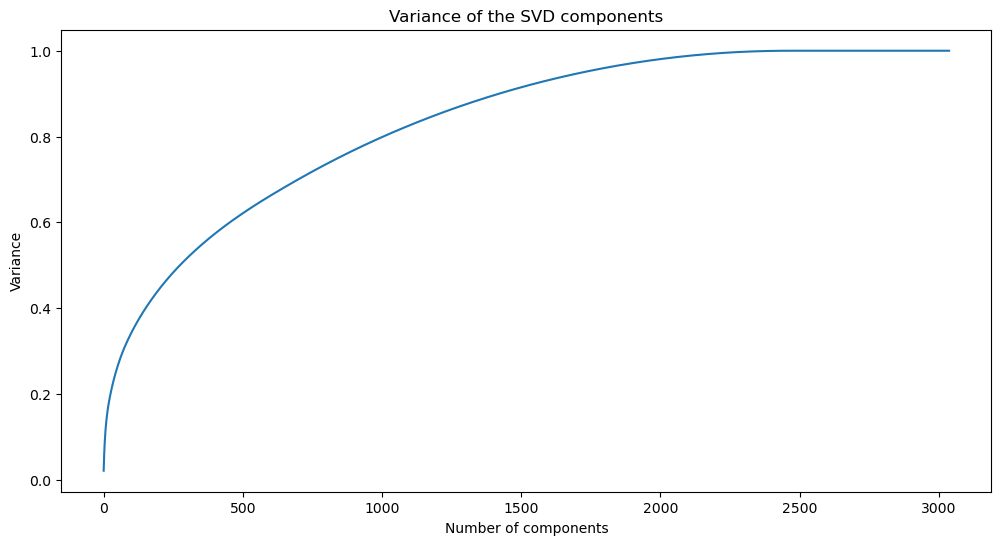

- By observing the plot, we see that from around 2500, the curve starts to flatten out. Therefore, we should set the number of components to 2500.

In [125]:
# # Re-performing SVD with 2500 components
# train_variants_svd = TruncatedSVD(n_components=2500, random_state=42)
# train_variants_svd.fit(train_variants_tfidf_matrix)

# # Save the train_variants_svd
# joblib.dump(train_variants_svd, "../models/train_variants_svd.pkl")

In [126]:
# # Load the train_variants_svd
# train_variants_svd = joblib.load("../models/train_variants_svd.pkl")

# train_variants_svd_matrix = train_variants_svd.transform(train_variants_tfidf_matrix)
# train_variants_svd_df = pd.DataFrame(data=train_variants_svd_matrix)
# train_variants_svd_df.head()

In [127]:
# # Save the train_variants_svd_df
# train_variants_svd_df.to_csv("../data/processed/train_variants_svd_df.csv", index=False)

In [128]:
# # Replace np.nan on "Product about" with an empty string
# train_df['Product about'] = train_df['Product about'].replace(np.nan, '')

In [129]:
# # Create another vectorizer and SVD object for the "Product about" column
# train_product_about_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
# train_product_about_vectorizer.fit(train_df["Product about"])

# # Save the train_product_about_vectorizer
# joblib.dump(train_product_about_vectorizer, "../models/train_product_about_vectorizer.pkl")

# # Load the train_product_about_vectorizer
# train_product_about_vectorizer = joblib.load("../models/train_product_about_vectorizer.pkl")

# # Calculate the TF-IDF matrix for the "Product about" column
# train_product_about_tfidf_matrix = train_product_about_vectorizer.transform(train_df["Product about"])

# # Create a TruncatedSVD object
# train_product_about_svd = TruncatedSVD(n_components=5000, random_state=42)

# # Fit the TruncatedSVD object on the TF-IDF matrix of the "Product about" column
# train_product_about_svd.fit(train_product_about_tfidf_matrix)

# # Transform the TF-IDF matrix of the "Product about" column
# train_product_about_svd_matrix = train_product_about_svd.transform(train_product_about_tfidf_matrix)

# # Visualize the variance of the SVD components
# plot_variance(train_product_about_svd)

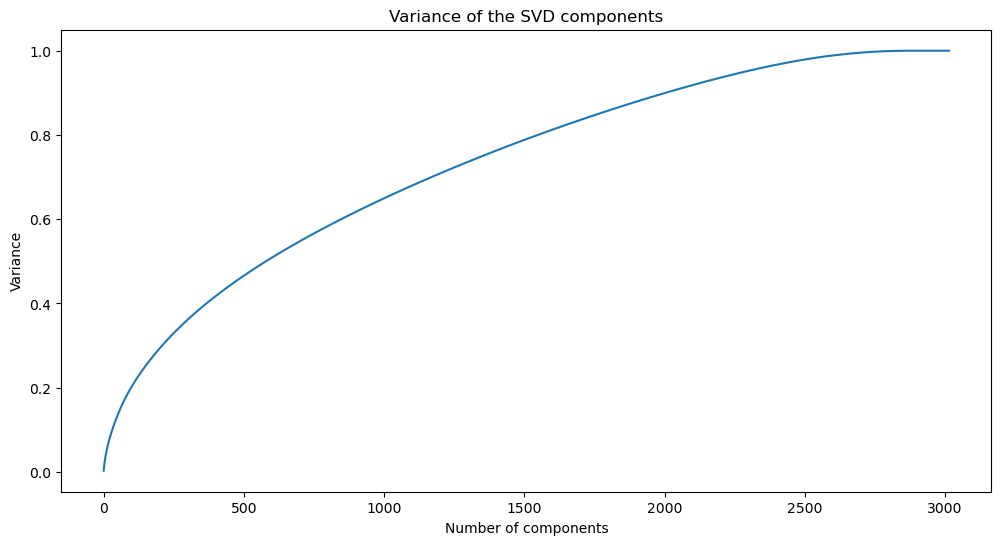

- By observing the plot, we see that from around 3000, the curve starts to flatten out. Therefore, we should set the number of components to 3000.

In [130]:
# # Re-performing SVD with 3000 components
# train_product_about_svd = TruncatedSVD(n_components=3000, random_state=42)
# train_product_about_svd.fit(train_product_about_tfidf_matrix)

# # Save the train_product_about_svd
# joblib.dump(train_product_about_svd, "../models/train_product_about_svd.pkl")

In [131]:
# # Load the train_product_about_svd
# train_product_about_svd = joblib.load("../models/train_product_about_svd.pkl")

# # Transform the TF-IDF matrix of the "Product about" column
# train_product_about_svd_matrix = train_product_about_svd.transform(train_product_about_tfidf_matrix)

# # Create a DataFrame from the TruncatedSVD matrix
# train_product_about_svd_df = pd.DataFrame(data=train_product_about_svd_matrix)
# train_product_about_svd_df.head()

# # Save the train_product_about_svd_df
# train_product_about_svd_df.to_csv("../data/processed/train_product_about_svd_df.csv", index=False)

In [132]:
# # Create TfIdfVectorizer object which will calculate the TF-IDF matrix
# train_fabric_type_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
# train_fabric_type_vectorizer.fit(train_df['Fabric type'])

# # Save the train_fabric_type_vectorizer
# joblib.dump(train_fabric_type_vectorizer, '../models/train_fabric_type_vectorizer.pkl')

In [133]:
# # Load the train_fabric_type_vectorizer
# train_fabric_type_vectorizer = joblib.load('../models/train_fabric_type_vectorizer.pkl')

# # Calculate the TF-IDF matrix for the "Fabric type" column
# train_fabric_type_tfidf_matrix = train_fabric_type_vectorizer.transform(train_df['Fabric type'])
# train_fabric_type_tfidf_matrix

In [134]:
# # Create a TruncatedSVD object
# train_fabric_type_svd = TruncatedSVD(n_components=1000, random_state=42)

# # Fit the TruncatedSVD object on the TF-IDF matrix of the "Fabric type" column
# train_fabric_type_svd.fit(train_fabric_type_tfidf_matrix)

# # Save the train_fabric_type_svd
# joblib.dump(train_fabric_type_svd, '../models/train_fabric_type_svd.pkl')

In [135]:
# # Load the train_fabric_type_svd
# train_fabric_type_svd = joblib.load('../models/train_fabric_type_svd.pkl')

# # Transform the TF-IDF matrix of the "Fabric type" column
# train_fabric_type_svd_matrix = train_fabric_type_svd.transform(train_fabric_type_tfidf_matrix)

# # Visualize the variance of the SVD components
# plot_variance(train_fabric_type_svd)

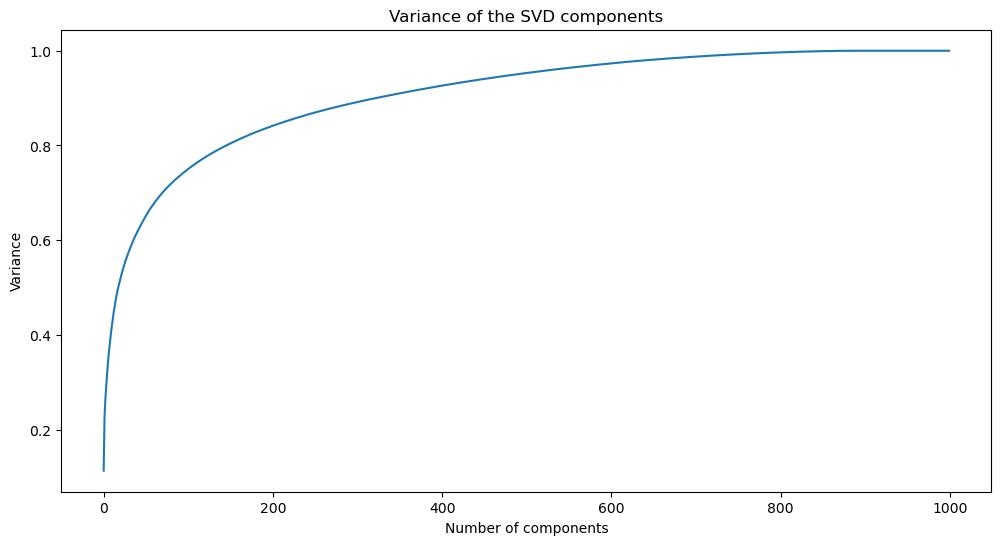

- By observing the plot, we see that from around 850, the curve starts to flatten out. Therefore, we should set the number of components to 850.

In [136]:
# # Re-performing SVD with 850 components
# train_fabric_type_svd = TruncatedSVD(n_components=850, random_state=42)
# train_fabric_type_svd.fit(train_fabric_type_tfidf_matrix)

# # Save the train_fabric_type_svd
# joblib.dump(train_fabric_type_svd, '../models/train_fabric_type_svd.pkl')

In [130]:
train_df.shape

(3752, 10)

In [129]:
train_df['product_details.Fabric type'].value_counts()

product_details.Fabric type
100% Polyester                                                                                        478
100% Cotton                                                                                           463
unknown                                                                                               137
Polyester                                                                                              92
60% Cotton, 40% Polyester                                                                              81
                                                                                                     ... 
77%Combed Cotton, 22%Nylon, 1%Lycra                                                                     1
Fabric: 100%Cotton/ Lining: 20%Cotton, 80%Polyester                                                     1
65% Viscose made from bamboo; 29% Cotton; 6% Spandex                                                    1
60 % Rayon made fr

In [137]:
# # Load the train_fabric_type_svd
# train_fabric_type_svd = joblib.load('../models/train_fabric_type_svd.pkl')

# # Transform the TF-IDF matrix of the "Fabric type" column
# train_fabric_type_svd_matrix = train_fabric_type_svd.transform(train_fabric_type_tfidf_matrix)

In [138]:
# # Create a DataFrame from the TruncatedSVD matrix
# train_fabric_type_svd_df = pd.DataFrame(data=train_fabric_type_svd_matrix)
# train_fabric_type_svd_df.head()

In [139]:
# # Save the train_fabric_type_svd_df
# train_fabric_type_svd_df.to_csv("../data/processed/train_fabric_type_svd_df.csv", index=False)